## Projeto automóveis

### Análise exploratória sobre cojunto de dados de carros usados

#### Objetivo - Tirar insights e analisar exploratoriamente 


1- fazer os imports
2- trocar o nome das colunas
3- retirar as variaveis não numericas
4- aderir o grafico de correlação
5-mapa de calor
----------------------------------
6- Perguntas
    - Qual o ano com o maior registro de carros
    -qual o carro com maior resgistro
    - existe valores não nulos
    -fazer o describe
    -tiras as medias
Perguntas com gráfico
números de preço por marca
números veiculos por marca
outliers

In [1]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style = "white")
%matplotlib inline

In [2]:
# import do dataset
data = pd.read_csv('autos.csv')
df = pd.DataFrame(data)

In [3]:
#Cabeçalho do dataset
df.head(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313687 entries, 0 to 313686
Data columns (total 27 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          313687 non-null  object
 1   name                 313687 non-null  object
 2   seller               313687 non-null  object
 3   offerType            313687 non-null  object
 4   price                313687 non-null  int64 
 5   abtest               313687 non-null  object
 6   vehicleType          313687 non-null  object
 7   yearOfRegistration   313687 non-null  int64 
 8   gearbox              313687 non-null  object
 9   powerPS              313687 non-null  int64 
 10  model                313687 non-null  object
 11  kilometer            313687 non-null  int64 
 12  monthOfRegistration  313687 non-null  object
 13  fuelType             313498 non-null  object
 14  brand                313687 non-null  object
 15  notRepairedDamage    313687 non-nu

In [5]:
list(df.columns)

['dateCrawled',
 'name',
 'seller',
 'offerType',
 'price',
 'abtest',
 'vehicleType',
 'yearOfRegistration',
 'gearbox',
 'powerPS',
 'model',
 'kilometer',
 'monthOfRegistration',
 'fuelType',
 'brand',
 'notRepairedDamage',
 'dateCreated',
 'postalCode',
 'lastSeen',
 'yearOfCreation',
 'yearCrawled',
 'monthOfCreation',
 'monthCrawled',
 'NoOfDaysOnline',
 'NoOfHrsOnline',
 'yearsOld',
 'monthsOld']

In [6]:
#Lista de colunas
list(df.columns)
df = df.rename(columns={'dateCrawled': 'data-rastreamento', 'name': 'nome', 'seller': 'vendendor','offerType':'tipo-oferta',
                       'price': 'preço', 'vehicleType': 'Tipo-Veiculo', 'yearOfRegistration': 'ano-registro',
                       'gearbox': 'caixa-velocidade', 'powerPS': 'power', 'model': 'modelo', 'kilometer': 'km',
                       'monthOfRegistration': 'mes-registro', 'fuelType': 'combustivel', 'brand': 'marca',
                       'notRepairedDamage': 'danos-sem-reparo', 'dateCreated': 'data-criada', 'postalCode': 'codigo-postal',
                       'lastSeen': 'visto-ultimo', 'yearOfCreation': 'ano-criacao', 'yearCrawled': 'ano-restreado',
                       'monthOfCreation': 'mes-criacao', 'monthCrawled': 'mes-rastreado', 'yearsOld': 'anos-idade',
                       'monthsOld': 'meses-idade'})

In [7]:
df.head()

,data-rastreamento,nome,vendendor,tipo-oferta,preço,abtest,Tipo-Veiculo,ano-registro,caixa-velocidade,power,...,codigo-postal,visto-ultimo,ano-criacao,ano-restreado,mes-criacao,mes-rastreado,NoOfDaysOnline,NoOfHrsOnline,anos-idade,meses-idade
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5


In [8]:
df.corr()

,preço,ano-registro,power,km,codigo-postal,ano-criacao,ano-restreado,NoOfDaysOnline,NoOfHrsOnline,anos-idade,meses-idade
preço,1.000000,0.376027,0.163499,-0.268458,0.070188,-0.006221,NaN,0.133884,-0.018861,-0.376027,-0.097924
ano-registro,0.376027,1.000000,0.048782,-0.114523,0.028707,-0.000559,NaN,0.002932,0.002358,-1.000000,-0.067759
power,0.163499,0.048782,1.000000,0.022740,0.021155,-0.000509,NaN,0.020227,-0.002630,-0.048782,-0.037124
km,-0.268458,-0.114523,0.022740,1.000000,0.004220,0.004046,NaN,-0.049819,0.009323,0.114523,-0.020406
codigo-postal,0.070188,0.028707,0.021155,0.004220,1.000000,0.001371,NaN,0.027324,0.003309,-0.028707,-0.010752
ano-criacao,-0.006221,-0.000559,-0.000509,0.004046,0.001371,1.000000,NaN,-0.148169,-0.002086,0.000559,-0.002185
ano-restreado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NoOfDaysOnline,0.133884,0.002932,0.020227,-0.049819,0.027324,-0.148169,NaN,1.000000,-0.141280,-0.002932,0.002303
NoOfHrsOnline,-0.018861,0.002358,-0.002630,0.009323,0.003309,-0.002086,NaN,-0.141280,1.000000,-0.002358,-0.005850
anos-idade,-0.376027,-1.000000,-0.048782,0.114523,-0.028707,0.000559,NaN,-0.002932,-0.002358,1.000000,0.067759


## PRINCIPAIS COMPARAÇÕES 

####  -Qual o maior preço de um carro usado? 
####  -O que podemos saber obtendo esse dados?
            -quantos veiculos com o preço maximo
            -Qual o ano de rastreamento desses veiculos
            -Qual o tipo desses veiculos
            

In [9]:
maior_preco = df.preço.max()
menor_preco = df.preço.min()
media_preco = df.preço.mean()
print(f"O maior preço do carro {maior_preco}")
print(f"O menor preço de carro {menor_preco}")
print(df.loc[df['preço'] == maior_preco])
print(df.loc[df['preço']== menor_preco])
'''
  
    14 Veículos do tipo SUV tem o valor máximo
    TODOS COM ANO DE RASTREAMENTO EM 2016
    4 VEICULOS MANUAIS E 10 AUTOMÁTICOS
    
    Já na lista dos véiculos com o preço mínimo temos uma lista de 10.014 véiculos que saíram a 0.00 us
--------------------------------------------------
  CARRO USADO MAIS CARO PELO COM MAIS ANOS 
  ANO DE CRIAÇÃO: 2001
  PREÇO: 28.800,00
  IDADE: 15 ANOS E 2 MESES
  TIPO:SUV
  ID: 144917
  MARCA: TOYOTA - Landcruiser
  POWER: 131
--------------------------------------------------
  CARRO USADO MAIS CARO COM MENOR IDADE
  ANO DE CRIAÇÃO: 2015
  PREÇO: 28.800,00
  IDADE: 1 ANO E 10 MESES
  TIPO: SUV
  ID: 85232
  MARCA: AUDI - X1_XDRIVE
  POWER: 150
  '''

O maior preço do carro 28800
O menor preço de carro 0
          data-rastreamento  \
2098    2016-03-28 19:21:47   
22592   2016-03-09 22:51:00   
85232   2016-03-12 15:53:09   
97096   2016-03-19 16:57:00   
116435  2016-03-25 21:37:21   
116933  2016-03-21 14:48:46   
125553  2016-03-28 05:36:17   
141377  2016-03-09 22:51:02   
144917  2016-03-27 22:50:54   
158108  2016-03-26 12:56:25   
159913  2016-03-30 16:47:39   
179642  2016-03-27 22:57:59   
214716  2016-03-15 20:57:20   
268165  2016-03-18 07:36:45   

                                                     nome vendendor  \
2098    Mazda_VOLLAUSSTATTUNG_CX_5_2.2_AWD_Aut_Sports_...    privat   
22592                     Sehr_gepflegter_Mercedes_ML_350    privat   
85232                                    Audi_Q5__TDI_2_0    privat   
97096   BMW_X1_xDrive20d_Aut._AHK_Navi_Panoramadach__L...    privat   
116435  Mercedes_ML350_CDI_4Matic_Sportpaket_Offroad_P...    privat   
116933  Land_Rover_Defender_90_Station_Wagon_S_AHK__St

'\n  \n    14 Veículos do tipo SUV tem o valor máximo\n    TODOS COM ANO DE RASTREAMENTO EM 2016\n    4 VEICULOS MANUAIS E 10 AUTOMÁTICOS\n    \n    Já na lista dos véiculos com o preço mínimo temos uma lista de 10.014 véiculos que saíram a 0.00 us\n--------------------------------------------------\n  CARRO USADO MAIS CARO PELO COM MAIS ANOS \n  ANO DE CRIAÇÃO: 2001\n  PREÇO: 28.800,00\n  IDADE: 15 ANOS E 2 MESES\n  TIPO:SUV\n  ID: 144917\n  MARCA: TOYOTA - Landcruiser\n  POWER: 131\n--------------------------------------------------\n  CARRO USADO MAIS CARO COM MENOR IDADE\n  ANO DE CRIAÇÃO: 2015\n  PREÇO: 28.800,00\n  IDADE: 1 ANO E 10 MESES\n  TIPO: SUV\n  ID: 85232\n  MARCA: AUDI - X1_XDRIVE\n  POWER: 150\n  '

### Preço x Típo de veiculo

In [10]:
df.loc[df['ano-registro']== 1910]
'''O primeiro ano de contagem foi o ano de 1910, naquele ano 100 carros foram registrados'''

'O primeiro ano de contagem foi o ano de 1910, naquele ano 100 carros foram registrados'

## Distribuição de veículos com base no ano de registro

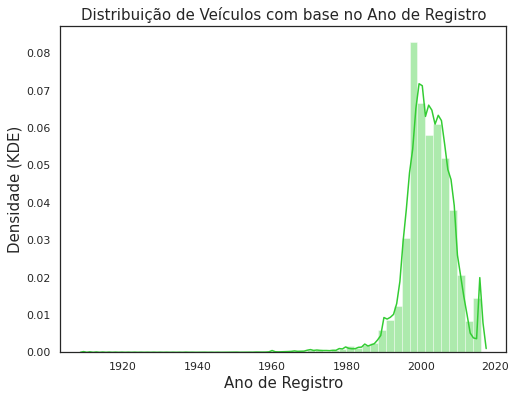

In [11]:
# Crie um Plot com a Distribuição de Veículos com base no Ano de Registro
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df["ano-registro"], color="#33cc33",kde=True, ax=ax)
ax.set_title('Distribuição de Veículos com base no Ano de Registro', fontsize= 15)
plt.ylabel("Densidade (KDE)", fontsize= 15)
plt.xlabel("Ano de Registro", fontsize= 15)
plt.show()

### Análise de Outliers

OBS: como interpretar um gráfico de outliers
Temos nos outliers os números máximos, mínimos nas pontas.
Primeiro e terceiros quartis mais ao meio.
E a mediana como segundo quartil(faixa do meio)

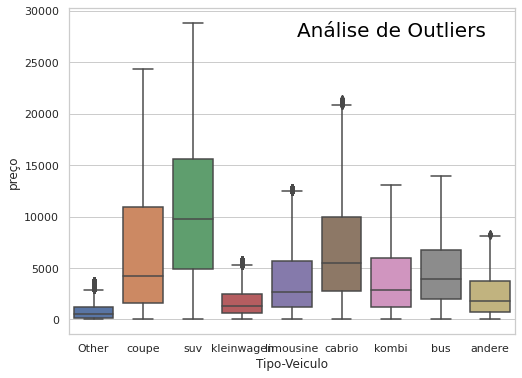

In [12]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x='Tipo-Veiculo', y='preço', data=df)
ax.text(6, 28000, "Análise de Outliers",fontsize=20,color='black', ha='center', va='center')
plt.show()

### Número de carros por marca

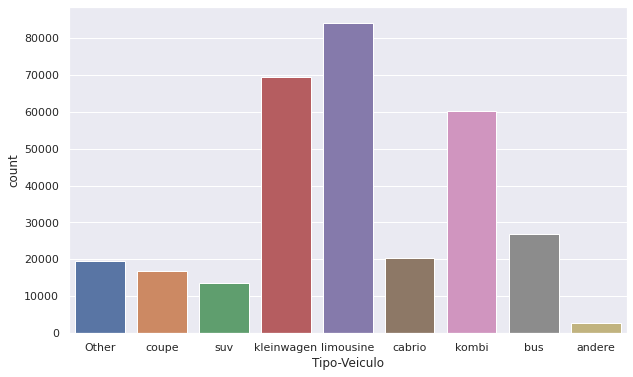

In [13]:
sns.set_style("darkgrid")
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=df, x='Tipo-Veiculo')
plt.show()

### Número de veículos pertencentes a cada marca

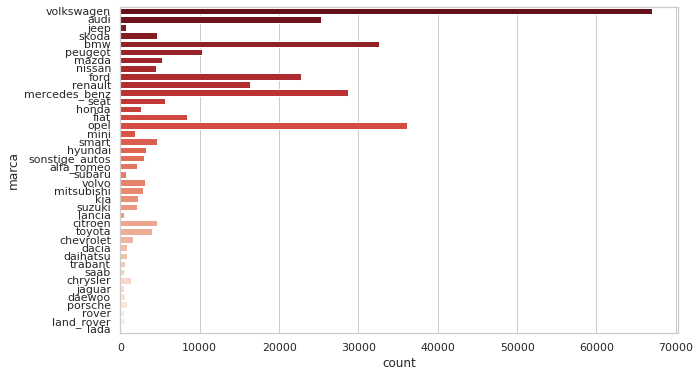

In [14]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(data=df, y='marca', palette='Reds_r')
plt.show()

### Preço dos carros por marca

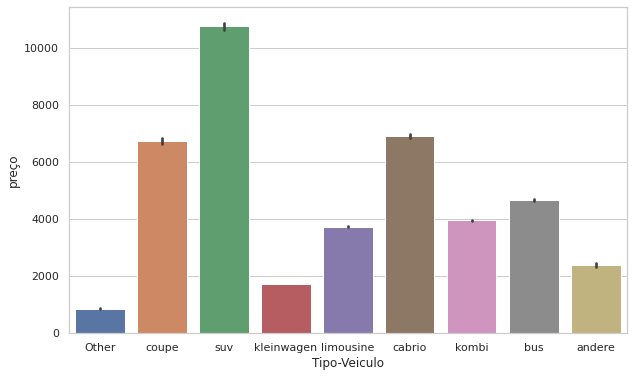

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
sns.set_style("darkgrid")
sns.barplot(data=df, x="Tipo-Veiculo", y='preço')
plt.show()

In [16]:
#nome de todos os carros que foram registrado em 1910
df3 = np.array(df[df['ano-registro'] == 1910]['nome'])

In [17]:
len(df3)

100

In [18]:
#carro mais caro
df.loc[df["preço"].idxmax()]

data-rastreamento                                  2016-03-28 19:21:47
nome                 Mazda_VOLLAUSSTATTUNG_CX_5_2.2_AWD_Aut_Sports_...
vendendor                                                       privat
tipo-oferta                                                      Offer
preço                                                            28800
abtest                                                            test
Tipo-Veiculo                                                       suv
ano-registro                                                      2014
caixa-velocidade                                             automatik
power                                                              175
modelo                                                        cx_reihe
km                                                               30000
mes-registro                                                       Jan
combustivel                                                     Diesel
marca 

In [22]:
#Quantidade de carros
df['Tipo-Veiculo'].value_counts()

limousine     84077
kleinwagen    69334
kombi         60195
bus           26833
cabrio        20388
Other         19447
coupe         16920
suv           13585
andere         2908
Name: Tipo-Veiculo, dtype: int64

In [25]:
#Correlação entre tipo de veiculo e preço
df[['Tipo-Veiculo', 'preço']].corr()

,preço
preço,1.0


In [26]:
#Quantos suv
df[df['marca']== 'mazda'].count()

data-rastreamento    5210
nome                 5210
vendendor            5210
tipo-oferta          5210
preço                5210
abtest               5210
Tipo-Veiculo         5210
ano-registro         5210
caixa-velocidade     5210
power                5210
modelo               5210
km                   5210
mes-registro         5210
combustivel          5209
marca                5210
danos-sem-reparo     5210
data-criada          5210
codigo-postal        5210
visto-ultimo         5210
ano-criacao          5210
ano-restreado        5210
mes-criacao          5210
mes-rastreado        5210
NoOfDaysOnline       5210
NoOfHrsOnline        5210
anos-idade           5210
meses-idade          5210
dtype: int64